# Political parties and policy outcomes

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
sns.set()

df = pd.read_csv('governors.csv')

## Explorative data analysis

In [3]:
df.describe()

,Unnamed: 0,dem_governor,dem_majority_house,dem_majority_senate,dem_margin,year,unemployment,murder,income_top_one_pct,house_prices
count,864.000000,861.000000,746.000000,746.000000,825.000000,864.000000,400.000000,775.000000,779.000000,471.000000
mean,1573.255787,0.544715,0.628686,0.604558,0.020541,1986.533565,5.956250,5.699613,12.786618,1.949188
std,889.024071,0.498286,0.483480,0.489274,0.207804,18.333180,2.003734,3.577288,4.711669,1.099159
min,1.000000,0.000000,0.000000,0.000000,-0.500000,1959.000000,2.300000,0.200000,4.013025,0.518150
25%,827.000000,0.000000,0.000000,0.000000,-0.100600,1970.000000,4.475000,2.800000,9.380197,1.100900
50%,1625.000000,1.000000,1.000000,1.000000,0.009000,1986.000000,5.700000,5.100000,11.597607,1.688325
75%,2358.500000,1.000000,1.000000,1.000000,0.139000,2002.000000,7.200000,7.900000,15.211016,2.458125
max,3059.000000,1.000000,1.000000,1.000000,0.500000,2017.000000,13.900000,20.299999,34.422260,6.598275


#### Pairplot visualisation 

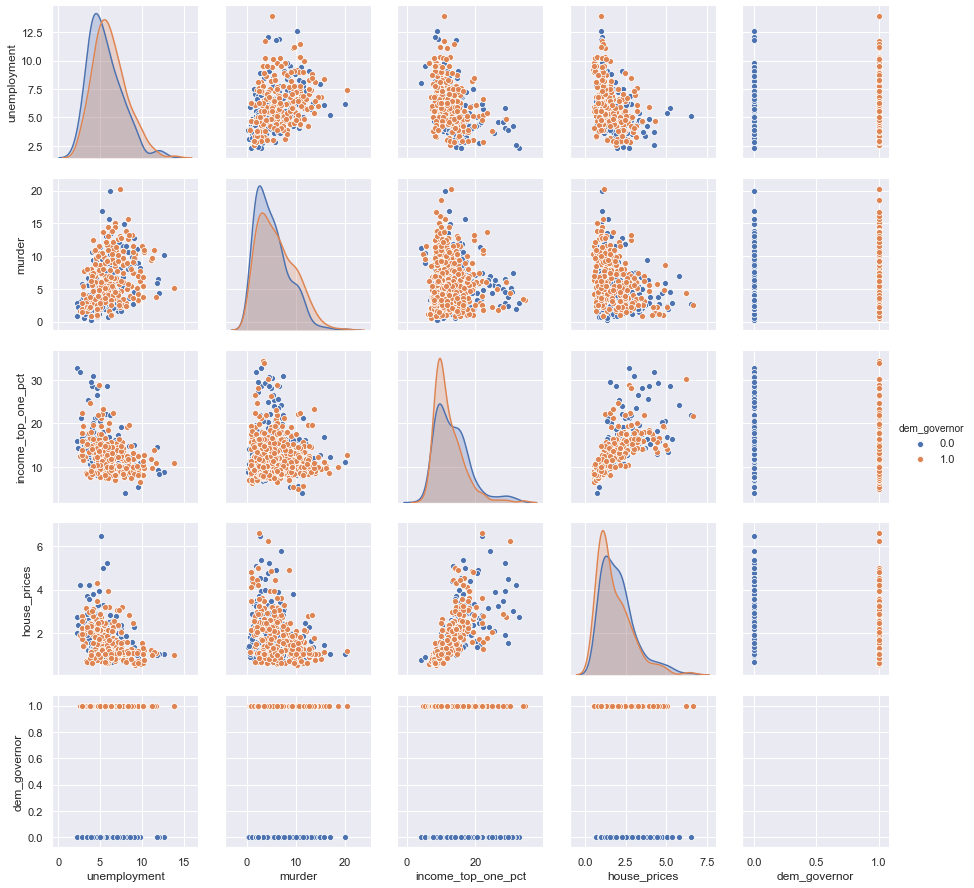

In [10]:
X = df[['unemployment', 'murder', 'income_top_one_pct', 'house_prices','dem_governor']]
sns.pairplot(X, hue = 'dem_governor')

#### Creating function to speed up the Linear regression process 

In [18]:
def LRstats(x,y, dataframe):
    
    dfi = dataframe[[ x, y ]]
    dfi = dfi.dropna()
    xvariable = dfi[x]
    yvariable = dfi[y]
    
    X = sm.add_constant(xvariable)
    results = sm.OLS(yvariable , X).fit()
    
    print('Rsquared:' , results.rsquared)
    print('Coeff:' , results.params[1])
    print('P-value:' , results.pvalues[1])


#### The actual regression 

In [123]:
LRstats( 'dem_governor' , 'murder' , df)

Rsquared: 0.018736000159162325
Coeff: 0.9831325572914582
P-value: 0.0001361888652157225


In [76]:
LRstats( 'dem_governor' , 'house_prices' , df)

Rsquared: 0.013640575658192766
Coeff: -0.2511781999748482
P-value: 0.011454515903142242


In [77]:
LRstats( 'dem_governor' , 'income_top_one_pct' , df)

Rsquared: 0.017599147186379227
Coeff: -1.2482662823001391
P-value: 0.00021058826647124307


In [78]:
LRstats( 'dem_governor' , 'unemployment' , df)

Rsquared: 0.02232972224164176
Coeff: 0.5995628666055944
P-value: 0.002734450426312623


## Multiple Linear Regression 

This MLR will involve 2 additional control variables. Each model will be run against each outcome variable: Murder, Unemployment, House Prices, Income of top1pct. 

#### Creating MLR function#

In [19]:
def MLRstats(y,a,b,c, dataframe):
    
    dfi = dataframe[[ y, a, b, c ]]
    dfi = dfi.dropna()
    xvariable = dfi[[a,b,c]]
    yvariable = dfi[y]
    
    X = sm.add_constant(xvariable)
    results = sm.OLS(yvariable , X).fit()
    
    print(y,':')
    print('Coeff dem gov:' , results.params[1])
    print('Coeff gov house:' , results.params[2])
    print('Coeff gov senate:' , results.params[3])
    print('Rsquared:' , results.rsquared)
    


### The actual MLR

#### Murder 

In [20]:
MLRstats('murder','dem_governor','dem_majority_house','dem_majority_senate', df)

murder :
Coeff dem gov: 0.38591444354323257
Coeff gov house: 2.272027358279286
Coeff gov senate: 0.8297810535408715
Rsquared: 0.16258581671246208


#### Unemployment

In [15]:
MLRstats('unemployment','dem_governor','dem_majority_house','dem_majority_senate', df)

unemployment :
Coeff gov: 0.42968619575863826
Coeff gov: 0.9054691633870583
Coeff gov: 0.17471745153545004
Rsquared: 0.08031796496017762


#### House prices

In [16]:
MLRstats('house_prices','dem_governor','dem_majority_house','dem_majority_senate', df)

house_prices :
Coeff gov: -0.23505133244018678
Coeff gov: 0.060273074774217714
Coeff gov: -0.1654358400328886
Rsquared: 0.016963888138304628


#### Income for top one percent 

In [17]:
MLRstats('income_top_one_pct','dem_governor','dem_majority_house','dem_majority_senate', df)

income_top_one_pct :
Coeff gov: -1.206419050272589
Coeff gov: 1.2193347733022781
Coeff gov: -1.4302063661014564
Rsquared: 0.02960386916336033


### Regression Discontinuity Design

In [67]:
def RDD(x,y,dataframe):
    df = dataframe[[x, y]]
    df = df.dropna()

    Udf = df[y]
    DMdf = df[x]

    u11 = Udf[DMdf < 0]
    dm11 = DMdf[DMdf < 0]

    X1 = sm.add_constant(dm11)
    resultsX = sm.OLS(u11 , X1).fit()

    u12 = Udf[DMdf > 0]
    dm12 = DMdf[DMdf > 0]

    X2 = sm.add_constant(dm12)
    resultsY = sm.OLS(u12 , X2).fit()
    
    xeq1 = DMdf[DMdf < 0]
    yeq1 = resultsX.params[1] * xeq1 + resultsX.params[0]
    b1, meq1 = polyfit(xeq1, yeq1, 1)    

    xeq2 = DMdf[DMdf > 0]
    yeq2 = resultsY.params[1] * xeq2 + resultsX.params[0]
    b2, meq2 = polyfit(xeq2, yeq2, 1)

    plt.scatter(DMdf, Udf, facecolors = 'none', edgecolors = 'r')
    plt.axvline(x=0)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.plot(xeq2, b2+ meq2*xeq2, c= 'green')
    plt.plot(xeq1, b1+ meq1*xeq1, c= 'b')
    print( 'Difference at discontinuity:' , b2 - b1 )

#### Murder 

Difference at discontinuity: 4.440892098500626e-15


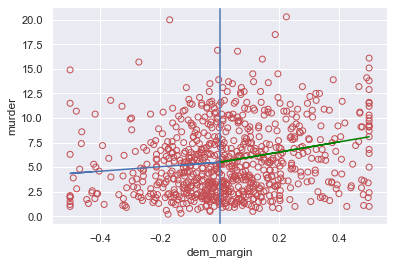

In [68]:
RDD('dem_margin', 'murder',df)

#### Unemployment 

Difference at discontinuity: 2.6645352591003757e-15


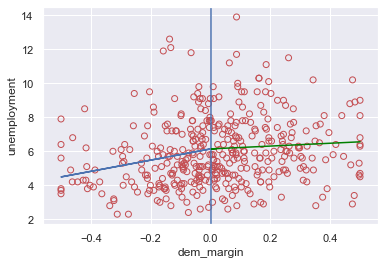

In [69]:
RDD('dem_margin', 'unemployment',df)

#### House prices

Difference at discontinuity: 1.7763568394002505e-15


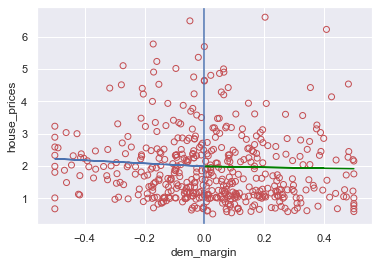

In [70]:
RDD('dem_margin','house_prices' ,df)

#### Income for top one percent 

Difference at discontinuity: -3.552713678800501e-15


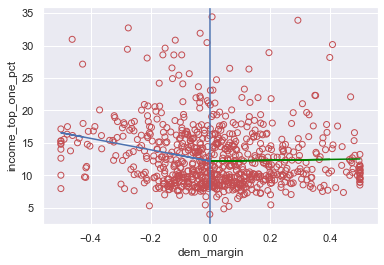

In [71]:
RDD('dem_margin', 'income_top_one_pct',df)